# IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import nltk
import sklearn


In [2]:
#LOAD THE DATASET

In [3]:
data = pd.read_csv('IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.drop_duplicates(inplace=True)


# TO REMOVE HTML TAGS AND APPLY CHANGES

In [6]:

data['review']= data['review'].str.lower()


In [7]:
import re
def rem_tags(text):
    p= re.compile('<.*?>')
    return p.sub(r'',text)


In [8]:

data['review'] = data['review'].apply(rem_tags)

# TO FILTER THE STOP WORDS

In [9]:
from nltk.corpus import stopwords
st_words= set(stopwords.words('english'))
def rem_stopwords(text):
    words= text.split()
    fil_words= [word for word in words if word.lower() not in st_words]
    return " ".join(fil_words)


In [10]:
data['review']= data['review'].apply(rem_stopwords)


In [11]:
data['review'][0]


"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

# TO REMOVE THE PUNCTUATIONS

In [12]:
import string 
trash= string.punctuation

def rem_punc(text):
    tt= str.maketrans('','',trash)
    return text.translate(tt)


In [13]:
data['review'] = data['review'].apply(rem_punc)


In [14]:
data['review'][0]


'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

## TO USE THE NLTK METHODS FOR TOKENIZATION

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
data['tokenized_review']= data['review'].apply(lambda x: word_tokenize(x))
data['tokenized_review'] = data['tokenized_review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gunasekhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gunasekhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TO DISPLAY SENTIMENT,TOKENIZED_REVIEW

In [16]:
data.head()


,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,"[basically, there, family, little, boy, jake, ..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [17]:
data['joined_review']= data['tokenized_review'].apply(lambda x: ' '.join(x))


In [18]:
data


,review,sentiment,tokenized_review,joined_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep...",one reviewer mentioned watching 1 oz episode h...
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...,negative,"[basically, there, family, little, boy, jake, ...",basically there family little boy jake think t...
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...
...,...,...,...,...
29994,enjoyed first toxic avenger sequel work funny ...,negative,"[enjoyed, first, toxic, avenger, sequel, work,...",enjoyed first toxic avenger sequel work funny ...
29995,new york love finally makes shores 10 short st...,positive,"[new, york, love, finally, make, shore, 10, sh...",new york love finally make shore 10 short stor...
29996,movie makes wish imdb would let vote zero one ...,negative,"[movie, make, wish, imdb, would, let, vote, ze...",movie make wish imdb would let vote zero one t...
29997,space camp unfortunate luck planned around tim...,negative,"[space, camp, unfortunate, luck, planned, arou...",space camp unfortunate luck planned around tim...


# TO DO TRAIN AND TEST PART

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['joined_review'],data['sentiment'],test_size=0.3,stratify=data['sentiment'],random_state=23)


TO DO THE PIPELINE WITH 3 STEPS:-
CountVectorizer (converts text to a matrix of token counts), 
TfidfTransformer (transforms the token counts to TF-IDF scores),
RandomForestClassifier (a machine learning model for classification).


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [21]:
pipeline = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('rfclf', RandomForestClassifier())
                    ])


In [22]:
pipeline.fit(x_train,y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('rfclf', RandomForestClassifier())])

In [23]:
y_pred= pipeline.predict(x_test)


TO PROVIDE THE CLASSIFICATION REPORT

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      4462
    positive       0.85      0.84      0.85      4494

    accuracy                           0.85      8956
   macro avg       0.85      0.85      0.85      8956
weighted avg       0.85      0.85      0.85      8956



#TO SHOW THE SENTIMENTS USING THE GRAPH

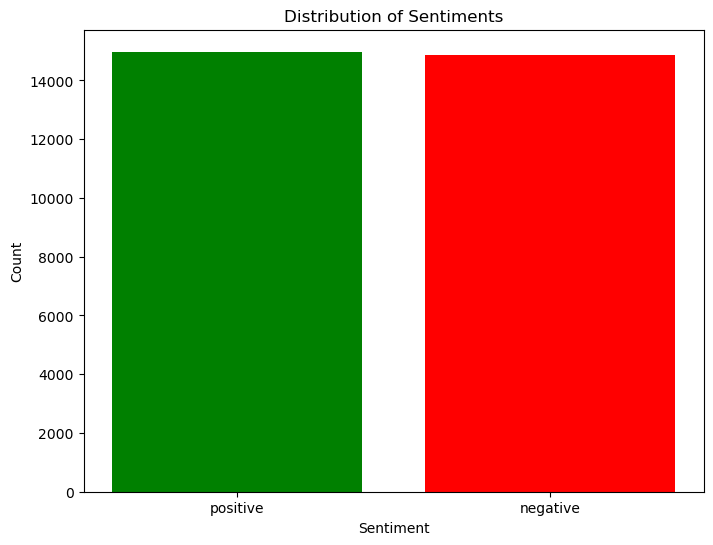

In [25]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


In [26]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 807.6 kB/s eta 0:00:00


WordCloud of Combined Reviews: Frequency of Words in MOVIES Dataset

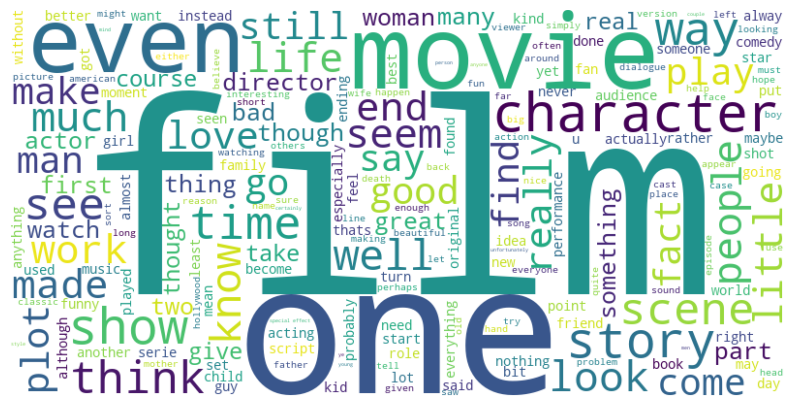

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all joined reviews into a single string
text = ' '.join(data['joined_review'].tolist())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
